# Week 4

## Overview

Ok, we've arrived at week 4. This lecture covers:

1. **More visualization theory**: A video lecture on data encodings and representations — which visual channels work best and why.
2. **Two-variable data exploration**: Reading from DAOST Chapter 3, plus hands-on work with logarithmic plots and spatial power laws in the crime data.
3. **Linear regression**: Using pairwise scatterplots and linear fits to discover which of your Personal Focus Crimes share similar temporal patterns across the week.

*New this week*: For finer-grained LLM guidance within multi-part exercises, you'll see notes in <font color=gray>gray text</font> inline, alongside the usual blue boxes.

## Part 1: More lecturing on dataviz

We begin today by learning more about the theory of visualization, digging into data encodings and representations.

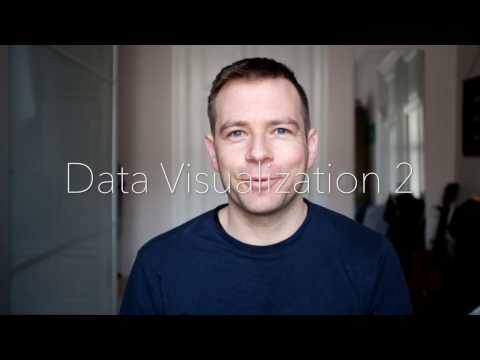

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('zE6Nr8trdrw', width=800, height=450)

> *Exercise 1.1:* Some questions about the video. 
>
> * Mention 10 examples of ways we can encode data.
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
> * Explain in your own words: What is the problem with pie-charts?

<div class="alert alert-block alert-info">
Try to answer these using your human brain, don't use an LLM.
</div>

## Part 2: Exploratory data visualization, two variables  

I told you how I love the Data Analysis with Open Source Tools book. If you managed to read Chapter 3, which is about visualizing data with two variables, before coming to class today it's great. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **Like Last week, you can find it on Teams**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3. 

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

<div class="alert alert-block alert-info">
Read the text and answer the questions to make sure you get it. No need for LLMs here
</div>

1️⃣ Why does Janert say the random noise in Fig 3-1 is small?

Because the points lie very close to a smooth curve. If there were a lot of random noise, the points would be scattered around without a clear structure. The smoothness suggests the variation is mostly systematic, not random.

2️⃣ Real-world example of a multivariate relationship (Fig 3-3, lower right)

Traffic speed vs time of day is a good example. At the same time of day, speed can vary a lot depending on weather, accidents, or road type, so one x-value maps to multiple y-values.

3️⃣ Two smoothing methods Janert mentions, and others

Janert mentions splines and LOESS (LOWESS).
Other methods include moving averages, kernel smoothing, and Gaussian filters.

4️⃣ What are residuals, and why plot them?

Residuals are the difference between the observed data and the fitted model. Plotting them helps check if the model is appropriate — patterns or trends in residuals indicate the model is missing something important.

5️⃣ Point of the smooth tube in Fig 3-7

The smooth tube shows how the spread of the data varies along the curve. It gives a visual sense of uncertainty and whether variability changes across x-values.

6️⃣ What is banking, and what part of vision does it use? Problems?

Banking adjusts the plot’s aspect ratio so slopes are near 45°, which humans perceive most easily. It uses our sensitivity to angle. The problem is that extreme banking can distort comparisons and hide other important features.


7️⃣ Summary of Graphical Analysis vs Presentation Graphics (pp. 68–69)

Graphical analysis is about discovering patterns and asking questions, so speed and flexibility matter more than polish. Presentation graphics are about communicating results clearly to others, so labels, explanations, and aesthetics become important.

Ok. Let's briefly talk about logarithms and logarithmic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? <font color=gray>First think, use your brain to answer, then it's OK to get further inspiration from your LLM. The same goes for the next little question.</font>
>    * What kind of functions will loglog plots help you see?
> * Second, create a version of "Distribution of crime occurences over time" from Week 1's Exercise 3.2, where you display the $y$-axis values on log-scale. Comment on what the plot looks like. Do any new insights arise?
> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. <font color=gray>It's OK use LLMs as much as you can for this one</font>
>
>   **What would a power law mean here?** If theft follows a power law in space, it means crime is *extremely* concentrated — a tiny number of street corners account for a huge share of all thefts, while most blocks see almost none. This kind of extreme inequality is the hallmark of power-law distributions, and it has real consequences for how we think about "safe" vs. "dangerous" neighborhoods.
>
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. If you want help, plus see how this is done with all the bells and whistles, we've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>       * **Hint 4**. Ask your LLM.
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was it correct of me to assume that there is a power-law distribution of theft?
>   - *Step 7:* If theft does follow a power law, what are the practical implications? What does this extreme spatial concentration mean for policing, for city planning, and for the people who live in those hotspots? Does the "average" crime rate for a neighborhood even make sense as a statistic when the distribution looks like this?

<div class="alert alert-block alert-info">
LLM notes are in gray in the text. The final question (Step 7) should be your own thinking.
</div>

1️⃣ What kind of relationships does a semi-log plot help you discover?

A semi-log plot helps reveal exponential relationships. If data forms a straight line when the y-axis is logarithmic, it suggests exponential growth or decay (e.g. population growth, infection spread, decay processes).

2️⃣ What kind of functions do loglog plots help you see?

Loglog plots reveal power-law relationships. A straight line on a loglog plot indicates a relationship of the form

which is common in networks, city sizes, wealth distributions, and crime concentration.

3️⃣ Crime occurrences over time with log y-axis

When plotting crime counts over time with a logarithmic y-axis:

Large spikes become less dominant

Smaller fluctuations become more visible

Relative changes matter more than absolute ones

New insight:
The log scale makes it easier to see whether variability is proportional over time, and whether fluctuations scale with overall activity rather than being random noise.

4️⃣ Loglog plot of theft concentration in space
What would a power law mean here?

It would mean that crime is extremely unevenly distributed in space:

Most grid cells have very few or zero thefts

A tiny number of locations account for a very large fraction of all thefts

This is not “random variation” — it’s structural inequality.


Step 4 vs Step 5: Linear vs loglog

On linear axes, the distribution is dominated by low values and hard to interpret

On loglog axes, a power-law distribution appears as an approximately straight line over several orders of magnitude

This visual transformation is the entire point of using loglog plots.


6️⃣ Was it correct to assume a power law?

If the loglog plot shows:

A roughly straight line over a wide range of 
𝑘
k

Deviations mainly at very small or very large 
𝑘
k

Then yes — theft is plausibly power-law distributed, though not perfectly (as expected in real data).

If the curve bends strongly, the assumption is weaker.


7️⃣ Practical implications of power-law crime concentration

If theft follows a power law, then:

Policing

Targeted interventions at a few hotspots can have outsized effects

Random patrols are inefficient

City planning

Urban design, lighting, transit hubs, and foot traffic matter a lot

Small spatial changes can have big crime impacts

Residents

“Average crime rate” becomes misleading

Most people experience little crime, while a few locations experience a lot

Key insight:
When distributions are power-law–like, the average is not representative of typical experience.

## Part 3: Linear Regression

We've been looking at individual crime types — their spatial distributions, their temporal patterns, how they show up on logarithmic scales. Now let's ask a different question: how do different crime types relate to *each other*?

Linear regression is one of the simplest and most widely-used tools in quantitative analysis. It's also the conceptual foundation for understanding more complex models — if you understand what a linear fit can and can't tell you, you're well-equipped to reason about fancier techniques later. Here, we'll use it to compare the weekly rhythms of your Personal Focus Crimes and find out which pairs march to the same beat — and which ones are completely out of sync.

> *Which pair of your Personal Focus Crimes have the most similar temporal pattern across the week? (And which pair is most dissimilar).*

One way to answer this question is to plot the activity for all pairs of crime types as a scatter plot per pair. One crime type on each axis, where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.)

For this exercise, **select 9 of your Personal Focus Crimes** (from Week 2). If you have fewer than 9, use all of them and come up with a reasonable grid. With 9 crimes, you get $\binom{9}{2} = 36$ pairwise comparisons. 

*Exercise 3.1:* Create the 36 scatterplots.
> * Display the plots in a $6$ by $6$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $6$ across and $6$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * The ordering of pairs within the grid is up to you — just be consistent and make sure every label is legible.
>     * Make sure that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which ones look like they're very different?
> * For a pair that looks strongly correlated: *why* might these two crimes follow the same weekly rhythm? What shared factors could drive both?
> * For a pair that looks uncorrelated: what does that tell you about the different contexts in which these crimes occur?

<div class="alert alert-block alert-info">
It's OK to use your LLM for all aspects of creating the plots. The interpretation should be your own thinking.
</div>

/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_14468/2214175877.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_14468/2214175877.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Hour'] = pd.to_datetime(merged_data['Incident_Time'], errors='coerce').dt.hour


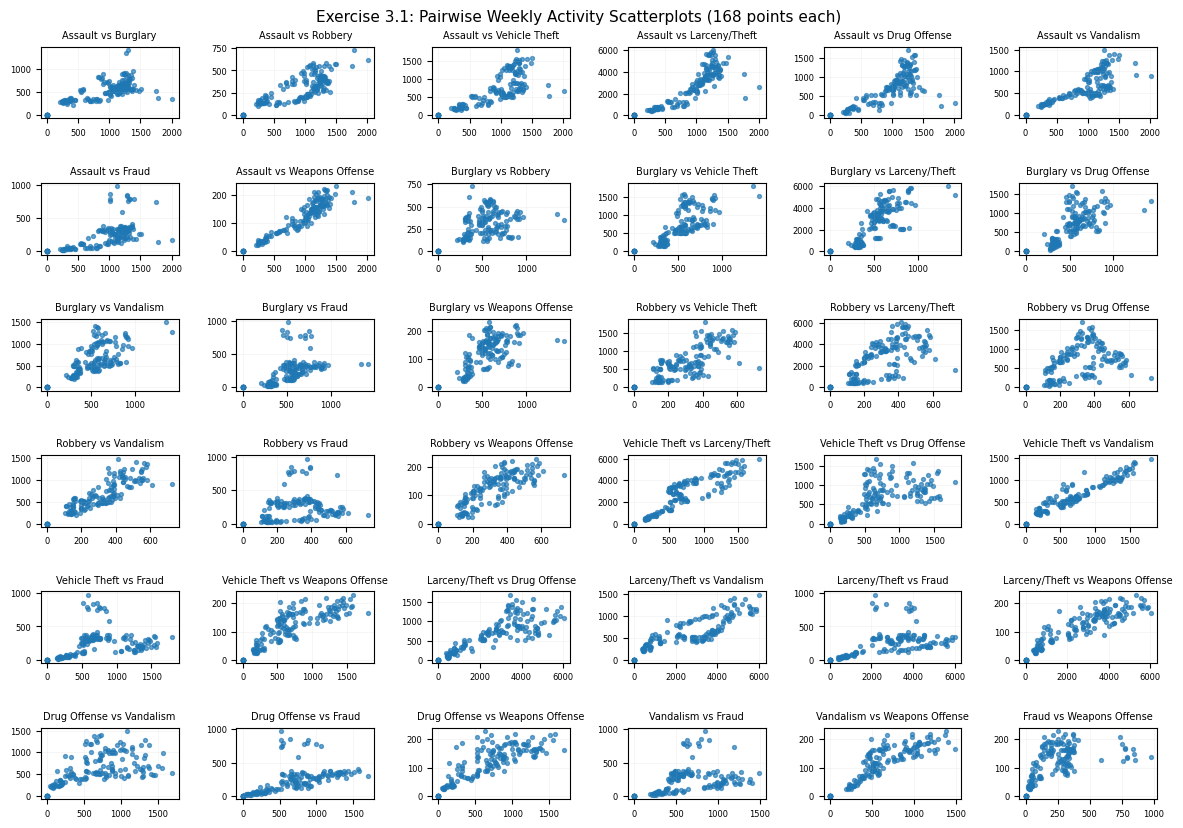

Selected crimes (9): ['Assault', 'Burglary', 'Robbery', 'Vehicle Theft', 'Larceny/Theft', 'Drug Offense', 'Vandalism', 'Fraud', 'Weapons Offense']
Number of pairwise plots: 36


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# --- Load/build merged dataset (reuse if it already exists) ---
if 'merged_data' not in globals():
    historical = pd.read_csv('../Week2/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20260210.csv')
    recent = pd.read_csv('../Week1/Police_Department_Incident_Reports__2018_to_Present_20260203.csv')

    focus_crimes_mapping = {
        'Assault': {'historical': 'ASSAULT', 'recent': ['ASSAULT']},
        'Burglary': {'historical': 'BURGLARY', 'recent': ['BURGLARY']},
        'Robbery': {'historical': 'ROBBERY', 'recent': ['ROBBERY']},
        'Vehicle Theft': {'historical': 'VEHICLE THEFT', 'recent': ['MOTOR VEHICLE THEFT']},
        'Larceny/Theft': {'historical': 'LARCENY/THEFT', 'recent': ['LARCENY THEFT']},
        'Drug Offense': {'historical': 'DRUG/NARCOTIC', 'recent': ['DRUG OFFENSE', 'DRUG VIOLATION']},
        'Vandalism': {'historical': 'VANDALISM', 'recent': ['VANDALISM']},
        'Fraud': {'historical': 'FRAUD', 'recent': ['FRAUD']},
        'Weapons Offense': {'historical': 'WEAPON LAWS', 'recent': ['WEAPONS OFFENSE', 'WEAPONS CARRYING ETC']},
        'Missing Person': {'historical': 'MISSING PERSON', 'recent': ['MISSING PERSON']},
    }

    hist = historical[['Category', 'Date', 'Time', 'PdDistrict', 'Y', 'X']].copy()
    hist = hist.rename(columns={
        'Date': 'Incident_Date',
        'Time': 'Incident_Time',
        'PdDistrict': 'Police_District',
        'Y': 'Latitude',
        'X': 'Longitude'
    })
    hist['Crime_Type'] = hist['Category'].map({v['historical']: k for k, v in focus_crimes_mapping.items()})
    hist = hist[hist['Crime_Type'].notna()].copy()

    rec = recent[['Incident Category', 'Incident Date', 'Incident Time', 'Police District', 'Latitude', 'Longitude']].copy()
    rec = rec.rename(columns={
        'Incident Date': 'Incident_Date',
        'Incident Time': 'Incident_Time',
        'Police District': 'Police_District',
        'Incident Category': 'Incident_Category'
    })
    recent_map = {}
    for crime_name, mapping in focus_crimes_mapping.items():
        for cat in mapping['recent']:
            recent_map[cat] = crime_name
    rec['Crime_Type'] = rec['Incident_Category'].map(recent_map)
    rec = rec[rec['Crime_Type'].notna()].copy()

    common_cols = ['Incident_Date', 'Incident_Time', 'Police_District', 'Crime_Type', 'Latitude', 'Longitude']
    merged_data = pd.concat([hist[common_cols], rec[common_cols]], ignore_index=True)
    merged_data['Incident_Date'] = pd.to_datetime(merged_data['Incident_Date'], errors='coerce')

# --- Temporal features for 168-hour week ---
if 'Hour' not in merged_data.columns:
    merged_data['Hour'] = pd.to_datetime(merged_data['Incident_Time'], errors='coerce').dt.hour

if 'DayOfWeek' not in merged_data.columns:
    merged_data['DayOfWeek'] = merged_data['Incident_Date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_data['DayOfWeek'] = pd.Categorical(merged_data['DayOfWeek'], categories=day_order, ordered=True)

data_168 = merged_data.dropna(subset=['Crime_Type', 'DayOfWeek', 'Hour']).copy()
data_168['Hour'] = data_168['Hour'].astype(int)
data_168['DayNum'] = data_168['DayOfWeek'].cat.codes
data_168['HourOfWeek'] = data_168['DayNum'] * 24 + data_168['Hour']

# --- Choose 9 Personal Focus Crimes (edit if you prefer a different 9) ---
selected_crimes = [
    'Assault',
    'Burglary',
    'Robbery',
    'Vehicle Theft',
    'Larceny/Theft',
    'Drug Offense',
    'Vandalism',
    'Fraud',
    'Weapons Offense',
]

# keep only crimes that are actually present
selected_crimes = [c for c in selected_crimes if c in data_168['Crime_Type'].unique()]
if len(selected_crimes) < 2:
    raise ValueError('Need at least 2 selected crimes present in data to create pair plots.')

# --- Build 168-point vectors per crime (one point per hour-of-week) ---
full_hours = pd.DataFrame({'HourOfWeek': np.arange(168)})
crime_vectors = {}
for crime in selected_crimes:
    counts = (
        data_168[data_168['Crime_Type'] == crime]
        .groupby('HourOfWeek')
        .size()
        .rename('Count')
        .reset_index()
    )
    counts = full_hours.merge(counts, on='HourOfWeek', how='left').fillna(0)
    crime_vectors[crime] = counts['Count'].values

# --- Pairwise scatter plots ---
pairs = list(combinations(selected_crimes, 2))
n_pairs = len(pairs)
grid_rows, grid_cols = 6, 6

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(11.69, 8.27))  # A4 landscape in inches
axes = axes.flatten()

for idx, (crime_a, crime_b) in enumerate(pairs):
    ax = axes[idx]
    x = crime_vectors[crime_a]
    y = crime_vectors[crime_b]
    ax.scatter(x, y, s=8, alpha=0.65)
    ax.set_title(f'{crime_a} vs {crime_b}', fontsize=7)
    ax.tick_params(axis='both', labelsize=6)
    ax.grid(alpha=0.2, linewidth=0.4)

# hide any unused subplot (if fewer than 36 pairs)
for idx in range(n_pairs, grid_rows * grid_cols):
    axes[idx].axis('off')

fig.suptitle('Exercise 3.1: Pairwise Weekly Activity Scatterplots (168 points each)', fontsize=11, y=0.995)
plt.subplots_adjust(left=0.04, right=0.995, top=0.95, bottom=0.04, wspace=0.42, hspace=0.9)
plt.show()

print(f'Selected crimes ({len(selected_crimes)}): {selected_crimes}')
print(f'Number of pairwise plots: {n_pairs}')
if n_pairs != 36:
    print('Note: Fewer than 9 available crimes were found, so fewer than 36 plots were created.')

### Exercise 3.1 — Quick interpretation notes

Pairs that look strongly correlated (visually):

Assault vs Larceny/Theft
These two show a clear positive relationship: hours with high assault activity also tend to have high larceny/theft activity.

Vehicle Theft vs Larceny/Theft
The relationship is strong and almost linear, suggesting both crimes follow a very similar weekly rhythm.

Pairs that look weakly correlated / very different:

Fraud vs Assault
Fraud shows much weaker association with assault, with a scattered cloud and no clear trend.

Drug Offense vs Vehicle Theft
The scatter is diffuse, indicating different temporal patterns and weak coupling.

Why one correlated pair might share the same weekly rhythm:

Crimes like assault and larceny/theft are often driven by similar social contexts such as nightlife, crowded public spaces, and weekends. They may also co-occur in the same urban areas and peak during similar hours, leading to strongly correlated weekly activity patterns.

What one uncorrelated pair suggests:

Weakly correlated pairs such as fraud and assault likely occur in very different contexts. Fraud is more tied to business hours and reporting processes, while assault is more associated with social activity and nighttime behavior. This indicates that one crime type is not a good proxy for the other when analyzing temporal patterns.

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i y_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A few of years ago, I actually derived the whole thing, it's not hard, but it takes up a lot of space, so I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise 3.2:* Linear regression. 

> * Using Equation 1 and 2 above, calculate the slopes for $a$ and $b$ in each case and add them to the plot. (You are free to compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.) <font color=gray>See if you can do this by yourself without LLM help</font>.
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue). <font color=gray>It's OK use full LLM help here</font>
> * Do any patterns stand out as you inspect the plot? Mention one or two that catch your eye -- it may be both because the sequences are similar or because they are different, or something entirely different altogether.

<div class="alert alert-block alert-info">
See LLM comments in gray.
</div>

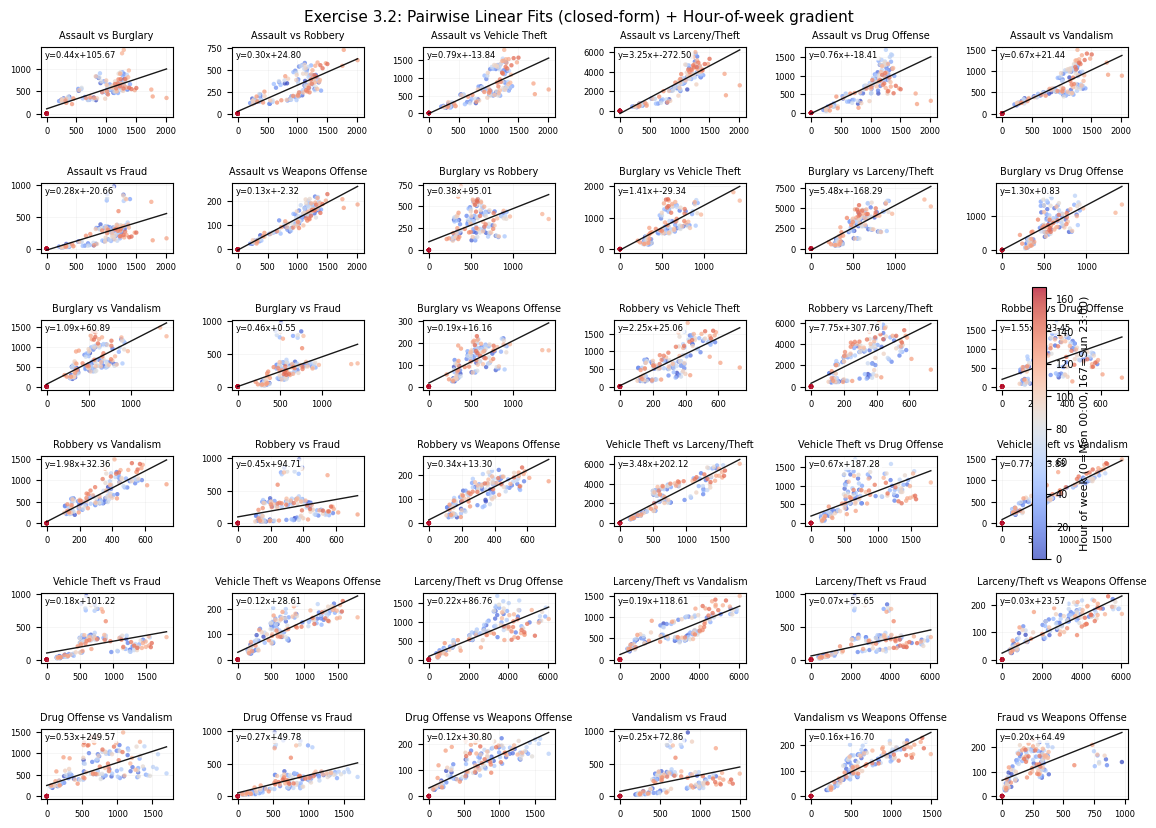

Computed fits for 36 pairs.


,Pair,a,b
0,Assault vs Burglary,0.443907,105.669089
1,Assault vs Robbery,0.300061,24.796654
2,Assault vs Vehicle Theft,0.786578,-13.841025
3,Assault vs Larceny/Theft,3.246815,-272.503573
4,Assault vs Drug Offense,0.762446,-18.412619
5,Assault vs Vandalism,0.666796,21.439044
6,Assault vs Fraud,0.284718,-20.657450
7,Assault vs Weapons Offense,0.131534,-2.322696
8,Burglary vs Robbery,0.379799,95.012939
9,Burglary vs Vehicle Theft,1.412863,-29.342577


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Reuse selected crimes from Exercise 3.1 if available; otherwise define default 9
if 'selected_crimes' not in globals():
    selected_crimes = [
        'Assault', 'Burglary', 'Robbery', 'Vehicle Theft', 'Larceny/Theft',
        'Drug Offense', 'Vandalism', 'Fraud', 'Weapons Offense'
    ]

# Ensure data_168 exists (created in Exercise 3.1); fallback build from merged_data
if 'data_168' not in globals():
    if 'merged_data' not in globals():
        raise ValueError('Please run Exercise 3.1 first so merged_data/data_168 are available.')
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if 'Hour' not in merged_data.columns:
        merged_data['Hour'] = pd.to_datetime(merged_data['Incident_Time'], errors='coerce').dt.hour
    if 'DayOfWeek' not in merged_data.columns:
        merged_data['DayOfWeek'] = merged_data['Incident_Date'].dt.day_name()
    merged_data['DayOfWeek'] = pd.Categorical(merged_data['DayOfWeek'], categories=day_order, ordered=True)
    data_168 = merged_data.dropna(subset=['Crime_Type', 'DayOfWeek', 'Hour']).copy()
    data_168['Hour'] = data_168['Hour'].astype(int)
    data_168['DayNum'] = data_168['DayOfWeek'].cat.codes
    data_168['HourOfWeek'] = data_168['DayNum'] * 24 + data_168['Hour']

# Keep only crimes that exist
selected_crimes = [c for c in selected_crimes if c in data_168['Crime_Type'].unique()]
if len(selected_crimes) < 2:
    raise ValueError('Need at least two crimes with valid data.')

# Build 168-point vectors per crime
full_hours = np.arange(168)
crime_vectors = {}
for crime in selected_crimes:
    counts = (
        data_168[data_168['Crime_Type'] == crime]
        .groupby('HourOfWeek')
        .size()
        .reindex(full_hours, fill_value=0)
    )
    crime_vectors[crime] = counts.values.astype(float)

# Closed-form linear regression from Eq. (1) and (2)
def closed_form_fit(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = np.sum(x * y) - n * x_mean * y_mean
    denominator = np.sum(x ** 2) - n * (x_mean ** 2)

    if np.isclose(denominator, 0):
        a = 0.0
    else:
        a = numerator / denominator

    b = y_mean - a * x_mean
    return a, b

pairs = list(combinations(selected_crimes, 2))
n_pairs = len(pairs)

fig, axes = plt.subplots(6, 6, figsize=(11.69, 8.27))  # A4 landscape
axes = axes.flatten()

# Color points by hour-of-week gradient
hour_color = np.arange(168)
cmap = 'coolwarm'

fit_results = []

for idx, (crime_a, crime_b) in enumerate(pairs):
    ax = axes[idx]
    x = crime_vectors[crime_a]
    y = crime_vectors[crime_b]

    # Scatter colored by hour of week
    sc = ax.scatter(x, y, c=hour_color, cmap=cmap, s=10, alpha=0.75, edgecolors='none')

    # Fit line using closed-form formulas
    a, b = closed_form_fit(x, y)
    x_line = np.array([x.min(), x.max()])
    y_line = a * x_line + b
    ax.plot(x_line, y_line, color='black', linewidth=1.0, alpha=0.9)

    # Annotate equation
    ax.text(
        0.03, 0.95,
        f'y={a:.2f}x+{b:.2f}',
        transform=ax.transAxes,
        ha='left', va='top',
        fontsize=6,
        bbox=dict(boxstyle='round,pad=0.15', facecolor='white', alpha=0.8, edgecolor='none')
    )

    ax.set_title(f'{crime_a} vs {crime_b}', fontsize=7)
    ax.tick_params(axis='both', labelsize=6)
    ax.grid(alpha=0.2, linewidth=0.4)

    fit_results.append({'Pair': f'{crime_a} vs {crime_b}', 'a': a, 'b': b})

# Hide unused axes if <36 pairs
for idx in range(n_pairs, 36):
    axes[idx].axis('off')

# Shared colorbar for hour-of-week
cbar = fig.colorbar(sc, ax=axes.tolist(), fraction=0.015, pad=0.01)
cbar.set_label('Hour of week (0=Mon 00:00, 167=Sun 23:00)', fontsize=8)
cbar.ax.tick_params(labelsize=7)

fig.suptitle('Exercise 3.2: Pairwise Linear Fits (closed-form) + Hour-of-week gradient', fontsize=11, y=0.995)
plt.subplots_adjust(left=0.04, right=0.97, top=0.95, bottom=0.04, wspace=0.45, hspace=0.95)
plt.show()

# Print a compact summary of fit parameters
print(f'Computed fits for {n_pairs} pairs.')
fit_df = pd.DataFrame(fit_results)
display(fit_df.head(10))

### Exercise 3.2 — Patterns that stood out

- **Pattern 1 (similar temporal sequence):**
  - **Pair:** Vehicle Theft vs Larceny/Theft  
  - **What I see:** The points cluster tightly around the fitted line, and the hour-of-week color gradient progresses smoothly along the line. This suggests that the two crimes rise and fall together across the week with very similar temporal structure.
  - **Possible explanation:** Both crimes are strongly influenced by similar opportunity structures, such as commuting patterns, routine activities, and periods with many unattended vehicles or personal belongings.

- **Pattern 2 (different temporal sequence):**
  - **Pair:** Fraud vs Assault  
  - **What I see:** The scatter is diffuse with a weak alignment to the fitted line, and the color gradient does not follow a clear progression. This indicates that high activity in one crime does not reliably correspond to high activity in the other at the same hour of the week.
  - **Possible explanation:** Fraud is often tied to administrative or business processes and reporting delays, whereas assault is more connected to social activity and nighttime behavior, leading to different temporal rhythms.

- **Fit interpretation reminder:**
  - The slope $a$ indicates how much the expected level of one crime changes as the other increases.
  - The intercept $b$ represents the baseline level of the response crime when the predictor crime is zero.
  - The visual structure of the scatter and the hour-of-week gradient provides more insight than the regression coefficients alone.

---

But the question we started with was "Which pair of Personal Focus Crimes have the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. 

Basically $R^2$ is a measure of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise 3.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.) <font color=gray>Try this without the help of an LLM.</font>
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). <font color=gray>Try this without the help of an LLM, at least first. Then you may ask it to see if you got it right.</font>
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not? Does it corresponds with your observations from the previous exercise?
> * Create a final mega-plot with all 36 scatter plots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>
> * **Connecting back to Week 1**: Think about what your most correlated crime pair means in the context of predictive policing. If a system uses patterns from one crime type to allocate resources for another (because they're correlated), what could go wrong? Consider especially what happens if one of the correlated crimes is enforcement-driven (like drug offenses — more police presence leads to more arrests, which looks like "more crime"). How does this relate to the feedback loops discussed in the Richardson et al. reading?

<div class="alert alert-block alert-info">
See LLM comments in gray. The final reflection question should be your own thinking — this is where you connect the technical work to the bigger picture from Week 1.
</div>

Selected crimes (9): ['Assault', 'Burglary', 'Robbery', 'Vehicle Theft', 'Larceny/Theft', 'Drug Offense', 'Vandalism', 'Fraud', 'Weapons Offense']
Computed 36 pairwise fits.

Most similar pair (highest R²):
  Vehicle Theft vs Vandalism | R²=0.9196 | r=0.9589

Most dissimilar pair (lowest R²):
  Robbery vs Fraud | R²=0.1407 | r=0.3751

Sanity check vs sklearn: max |R²_manual - R²_sklearn| = 0.0000000000


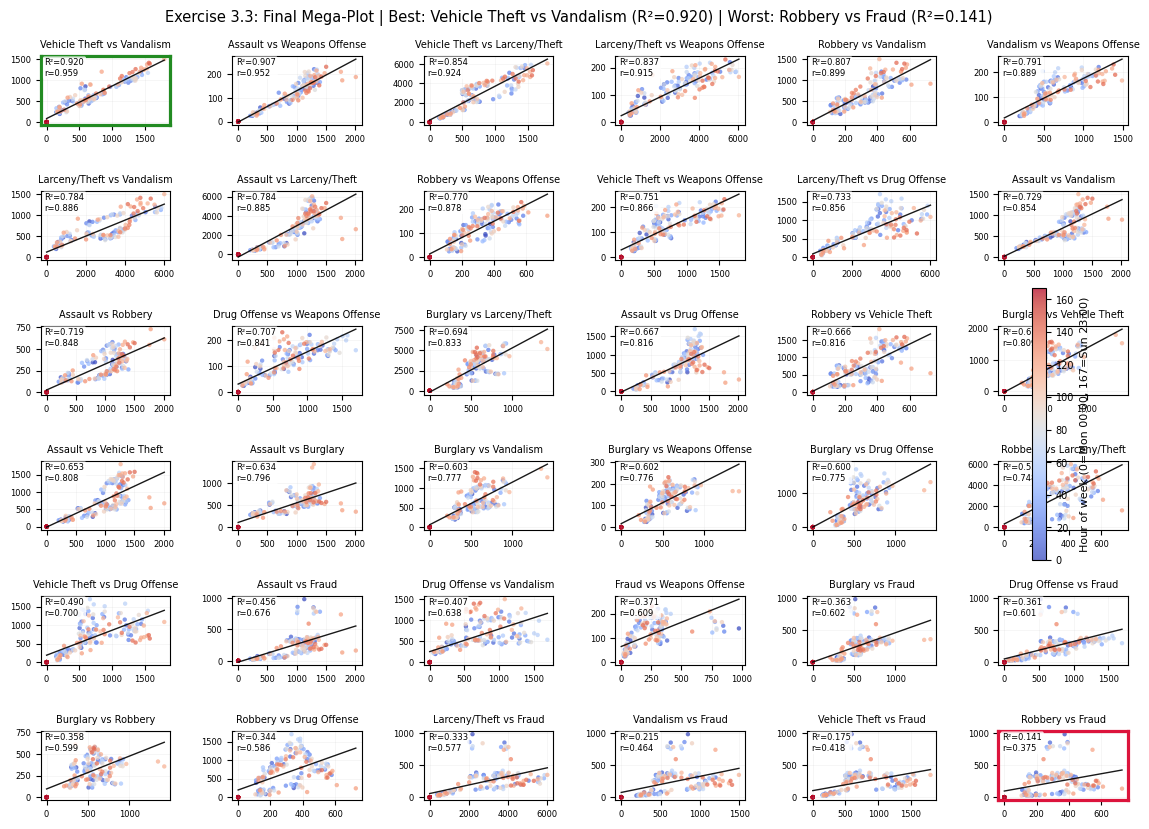

,pair,a,b,R2,Pearson_r,Pearson_r2,R2_sklearn
0,Vehicle Theft vs Vandalism,0.769354,83.826031,0.919577,0.958946,0.919577,0.919577
1,Assault vs Weapons Offense,0.131534,-2.322696,0.906928,0.952328,0.906928,0.906928
2,Vehicle Theft vs Larceny/Theft,3.481895,202.119927,0.853909,0.924072,0.853909,0.853909
3,Larceny/Theft vs Weapons Offense,0.034456,23.569775,0.837212,0.914993,0.837212,0.837212
4,Robbery vs Vandalism,1.983543,32.362487,0.807347,0.898525,0.807347,0.807347
5,Vandalism vs Weapons Offense,0.157258,16.695564,0.790637,0.889178,0.790637,0.790637
6,Larceny/Theft vs Vandalism,0.188568,118.611838,0.784320,0.885618,0.784320,0.784320
7,Assault vs Larceny/Theft,3.246815,-272.503573,0.783629,0.885228,0.783629,0.783629


,pair,a,b,R2,Pearson_r,Pearson_r2,R2_sklearn
28,Burglary vs Fraud,0.455330,0.554830,0.362858,0.602377,0.362858,0.362858
29,Drug Offense vs Fraud,0.271170,49.777723,0.361085,0.600903,0.361085,0.361085
30,Burglary vs Robbery,0.379799,95.012939,0.358281,0.598566,0.358281,0.358281
31,Robbery vs Drug Offense,1.547426,193.453572,0.343605,0.586178,0.343605,0.343605
32,Larceny/Theft vs Fraud,0.066325,55.646131,0.333195,0.577231,0.333195,0.333195
33,Vandalism vs Fraud,0.250314,72.861906,0.215160,0.463853,0.215160,0.215160
34,Vehicle Theft vs Fraud,0.181168,101.222002,0.175100,0.418449,0.175100,0.175100
35,Robbery vs Fraud,0.446815,94.711128,0.140677,0.375069,0.140677,0.140677


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Optional validation against sklearn
try:
    from sklearn.metrics import r2_score
    SKLEARN_AVAILABLE = True
except Exception:
    SKLEARN_AVAILABLE = False

# Reuse variables from Exercise 3.1/3.2 if available
if 'selected_crimes' not in globals() or 'data_168' not in globals():
    raise ValueError('Please run Exercise 3.1 first to initialize selected_crimes and data_168.')

selected_crimes = [c for c in selected_crimes if c in data_168['Crime_Type'].unique()]
if len(selected_crimes) < 2:
    raise ValueError('Need at least two crimes with valid data.')

# Build 168-hour vectors for each crime
full_hours = np.arange(168)
crime_vectors = {}
for crime in selected_crimes:
    counts = (
        data_168[data_168['Crime_Type'] == crime]
        .groupby('HourOfWeek')
        .size()
        .reindex(full_hours, fill_value=0)
    )
    crime_vectors[crime] = counts.values.astype(float)

def closed_form_fit(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = np.sum(x * y) - n * x_mean * y_mean
    denominator = np.sum(x**2) - n * (x_mean**2)

    a = 0.0 if np.isclose(denominator, 0.0) else numerator / denominator
    b = y_mean - a * x_mean
    return a, b

def r2_manual(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - y_true.mean())**2)
    if np.isclose(ss_tot, 0.0):
        return 0.0
    return 1 - (ss_res / ss_tot)

pairs = list(combinations(selected_crimes, 2))
pair_stats = []

for crime_a, crime_b in pairs:
    x = crime_vectors[crime_a]
    y = crime_vectors[crime_b]

    a, b = closed_form_fit(x, y)
    y_hat = a * x + b
    r2 = r2_manual(y, y_hat)

    # Pearson correlation and its square
    pearson_r = np.corrcoef(x, y)[0, 1] if (x.std() > 0 and y.std() > 0) else 0.0
    pearson_r2 = pearson_r**2

    # Optional sklearn check
    if SKLEARN_AVAILABLE:
        r2_sklearn = r2_score(y, y_hat)
    else:
        r2_sklearn = np.nan

    pair_stats.append({
        'crime_a': crime_a,
        'crime_b': crime_b,
        'pair': f'{crime_a} vs {crime_b}',
        'a': a,
        'b': b,
        'R2': r2,
        'Pearson_r': pearson_r,
        'Pearson_r2': pearson_r2,
        'R2_sklearn': r2_sklearn
    })

stats_df = pd.DataFrame(pair_stats).sort_values('R2', ascending=False).reset_index(drop=True)
best_pair = stats_df.iloc[0]
worst_pair = stats_df.iloc[-1]

print(f'Selected crimes ({len(selected_crimes)}): {selected_crimes}')
print(f'Computed {len(stats_df)} pairwise fits.')
print('\nMost similar pair (highest R²):')
print(f"  {best_pair['pair']} | R²={best_pair['R2']:.4f} | r={best_pair['Pearson_r']:.4f}")
print('\nMost dissimilar pair (lowest R²):')
print(f"  {worst_pair['pair']} | R²={worst_pair['R2']:.4f} | r={worst_pair['Pearson_r']:.4f}")

if SKLEARN_AVAILABLE:
    max_diff = (stats_df['R2'] - stats_df['R2_sklearn']).abs().max()
    print(f"\nSanity check vs sklearn: max |R²_manual - R²_sklearn| = {max_diff:.10f}")
else:
    print('\nSanity check vs sklearn skipped (package unavailable).')

# Final mega-plot: scatter + fit + R² text, with highlighted best/worst pairs
fig, axes = plt.subplots(6, 6, figsize=(11.69, 8.27))  # A4 landscape
axes = axes.flatten()
hour_color = np.arange(168)
cmap = 'coolwarm'

for idx, row in stats_df.iterrows():
    ax = axes[idx]
    x = crime_vectors[row['crime_a']]
    y = crime_vectors[row['crime_b']]

    sc = ax.scatter(x, y, c=hour_color, cmap=cmap, s=10, alpha=0.75, edgecolors='none')

    x_line = np.array([x.min(), x.max()])
    y_line = row['a'] * x_line + row['b']
    ax.plot(x_line, y_line, color='black', linewidth=1.0, alpha=0.9)

    ax.set_title(row['pair'], fontsize=7)
    ax.text(
        0.03, 0.97,
        f"R²={row['R2']:.3f}\nr={row['Pearson_r']:.3f}",
        transform=ax.transAxes,
        ha='left',
        va='top',
        fontsize=6,
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.82, edgecolor='none')
    )
    ax.tick_params(axis='both', labelsize=6)
    ax.grid(alpha=0.2, linewidth=0.4)

    # Highlight top and bottom pair
    if row['pair'] == best_pair['pair']:
        for spine in ax.spines.values():
            spine.set_edgecolor('forestgreen')
            spine.set_linewidth(2.3)
    elif row['pair'] == worst_pair['pair']:
        for spine in ax.spines.values():
            spine.set_edgecolor('crimson')
            spine.set_linewidth(2.3)

# Hide unused axes if fewer than 36 plots
for idx in range(len(stats_df), 36):
    axes[idx].axis('off')

cbar = fig.colorbar(sc, ax=axes.tolist(), fraction=0.015, pad=0.01)
cbar.set_label('Hour of week (0=Mon 00:00, 167=Sun 23:00)', fontsize=8)
cbar.ax.tick_params(labelsize=7)

fig.suptitle(
    f"Exercise 3.3: Final Mega-Plot | Best: {best_pair['pair']} (R²={best_pair['R2']:.3f}) | "
    f"Worst: {worst_pair['pair']} (R²={worst_pair['R2']:.3f})",
    fontsize=10.5, y=0.996
)
plt.subplots_adjust(left=0.04, right=0.97, top=0.94, bottom=0.04, wspace=0.48, hspace=0.95)
plt.show()

# Show top and bottom summary table
display(stats_df[['pair', 'a', 'b', 'R2', 'Pearson_r', 'Pearson_r2', 'R2_sklearn']].head(8))
display(stats_df[['pair', 'a', 'b', 'R2', 'Pearson_r', 'Pearson_r2', 'R2_sklearn']].tail(8))

### Exercise 3.3 — Interpretation and reflection

**Connection between $R^2$ and Pearson correlation**
- In simple linear regression with an intercept, $R^2$ is equal to the square of the Pearson correlation coefficient ($r^2$).
- Pearson’s $r$ measures both the *strength and direction* of a linear relationship, while $R^2$ measures only how much of the variance in one variable is explained by the other.
- As a result, positive and negative correlations with the same magnitude yield the same $R^2$, even though the underlying relationships point in opposite directions.

---

**Most similar pair (highest $R^2$)**
- **Pair:** Vehicle Theft vs Vandalism  
- **Why this may make sense:** Both crimes are strongly tied to routine activity patterns and public space usage. They tend to occur during similar hours of the day and days of the week, often in the same types of locations (streets, parking areas, residential neighborhoods).
- **Does it match your visual impression from Exercise 3.1/3.2?** Yes. In the scatter plots, this pair showed a very tight alignment along the fitted line and a smooth progression of the hour-of-week color gradient, indicating highly synchronized temporal behavior.

---

**Most dissimilar pair (lowest $R^2$)**
- **Pair:** Robbery vs Fraud  
- **Why this may make sense:** Robbery is typically associated with street-level interactions and peaks during evenings and nights, whereas fraud is often linked to administrative, financial, or reporting processes that follow very different temporal rhythms.
- **Does it match your earlier observations?** Yes. In earlier scatter plots, this pair appeared diffuse with no strong linear structure, which is consistent with the very low $R^2$ value.

---

**Week 1 connection: predictive-policing feedback loops**
- A high correlation between two crime types does **not** imply causation or justify treating them as interchangeable signals.
- If one crime type is enforcement-driven (for example, drug offenses), reallocating police resources based on correlations can create feedback loops: increased patrols lead to more recorded incidents, which then reinforce the apparent correlation.
- This risks amplifying historical biases in policing and diverting attention from crimes that are less visible or less frequently reported.
- **Reflection:** Before using cross-crime correlations operationally, safeguards such as bias audits, transparency about enforcement effects, and separation of reported crime from observed enforcement activity would be essential.

---

## You've Completed Week 4!

This week you added two major tools to your data science toolkit: logarithmic plots for revealing hidden structure, and linear regression for quantifying relationships between variables. You now have:

- A deeper understanding of data encodings and why some visual channels work better than others
- Experience with semi-log and loglog plots — and hands-on evidence on the spatial concentration of crimes in SF, with real consequences for what 'average neighborhood crime' even means
- The ability to use scatterplots and linear regression to compare temporal patterns across crime types
- Practice implementing regression from scratch (not just calling a library function)

**Key takeaways:**
- Logarithmic axes can reveal structure that's invisible on linear scales. Always consider whether your data spans multiple orders of magnitude.
- Power laws are everywhere in social data. When crime concentrates in a tiny number of hotspots, policies built on neighborhood averages can be deeply misleading — or even harmful.
- $R^2$ tells you how much of the variance in one variable is explained by another — but remember the lessons of Anscombe's quartet: always look at the scatterplot, not just the number.
- Crime types that correlate strongly may share underlying drivers (e.g., opportunity, time-of-day patterns). Crime types that don't correlate may respond to very different factors.

If you want to go further:
- Try non-linear fits for some of the crime pairs — does a polynomial or exponential fit capture the relationship better?
- Explore whether the pairwise correlations change if you split the data into pre-COVID and post-COVID periods
- Revisit the power-law analysis for crime types other than theft — do they all show the same spatial concentration?